In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

 79% 73.0M/92.1M [00:01<00:00, 75.2MB/s]
100% 92.1M/92.1M [00:01<00:00, 84.9MB/s]


In [ ]:
!unzip fake-news-classification.zip

Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/WELFake_Dataset.csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


#Data Preprocessing and Visualization

In [ ]:
y = df.label
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
df = df.fillna('')
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
df['news'] = df['title'] + df['text']


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    words = text.split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['news'] = df['news'].apply(clean_text)

In [ ]:
df['len'] = df['news'].str.len()

Text(0.5, 1.0, 'Distribution of Fake and Real News')

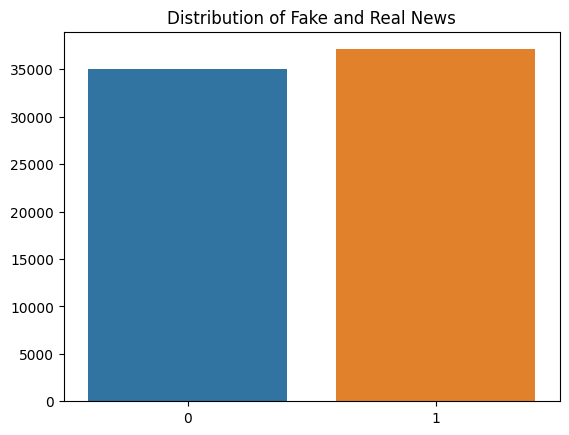

In [ ]:
classes = ['fake', 'real']
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count.values)
plt.title('Distribution of Fake and Real News',fontsize = 12 )

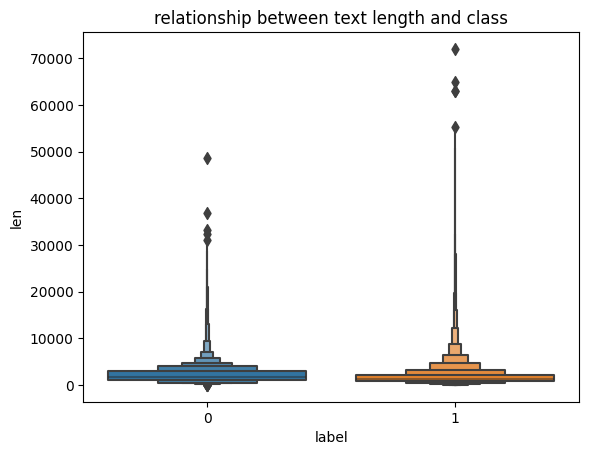

In [ ]:
sns.boxenplot(x = df['label'], y = df['len'])
plt.title('relationship between text length and class')
plt.show()

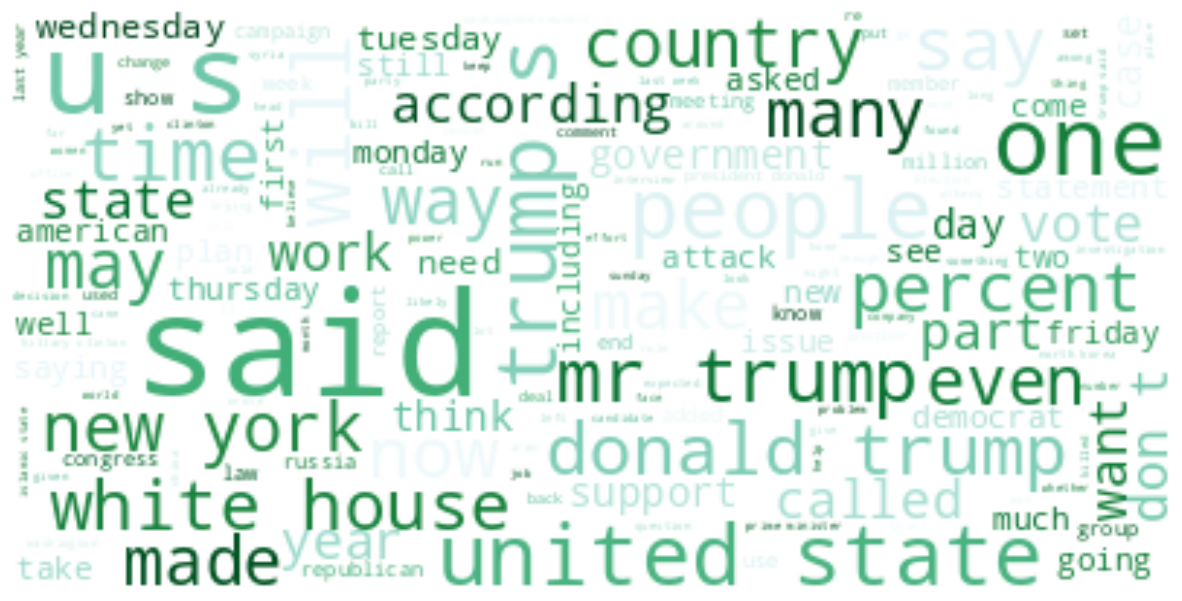

In [ ]:
fake_news = ' '.join(df[df['label']==0].text.values)
wordcloud = WordCloud(max_font_size=50, max_words=600, background_color="white",  colormap='BuGn').generate(fake_news.lower())
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

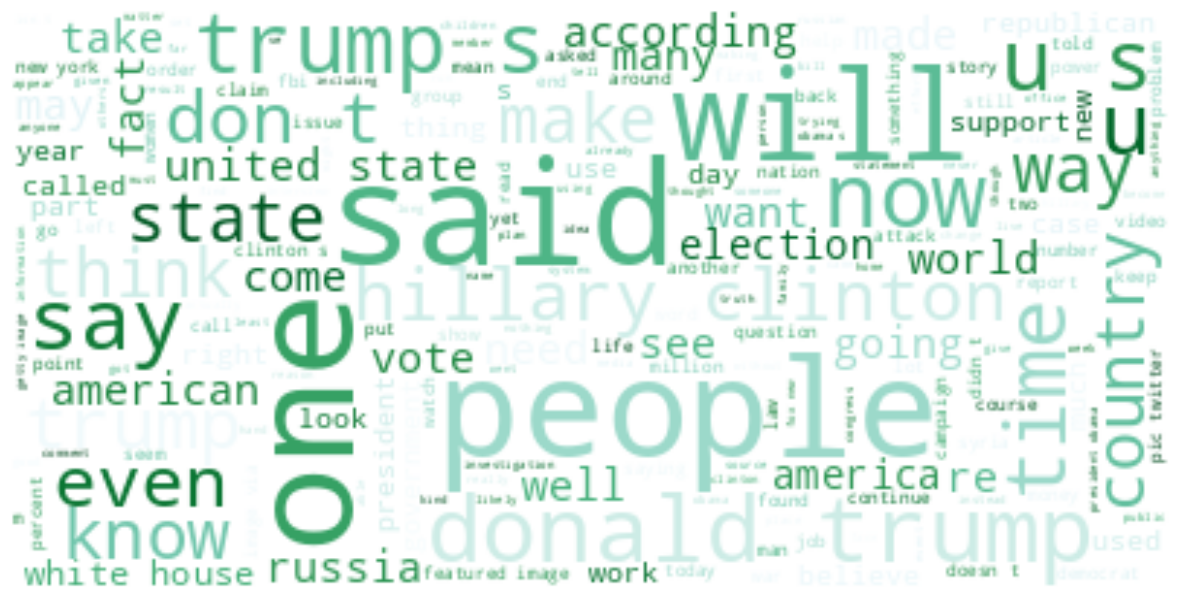

In [ ]:
real_news = ' '.join(df[df['label']==1].text.values)
wordcloud = WordCloud(max_font_size=50, max_words=600, background_color="white",  colormap='BuGn').generate(real_news.lower())
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

cv = CountVectorizer()
X = cv.fit_transform(df['news'])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#Naive-Bayes Classifier

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)
pred_nb = nb_classifier.predict(x_test)
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6946
           1       0.90      0.89      0.90      7481

    accuracy                           0.89     14427
   macro avg       0.89      0.89      0.89     14427
weighted avg       0.89      0.89      0.89     14427



Text(70.72222222222221, 0.5, 'Real Labels')

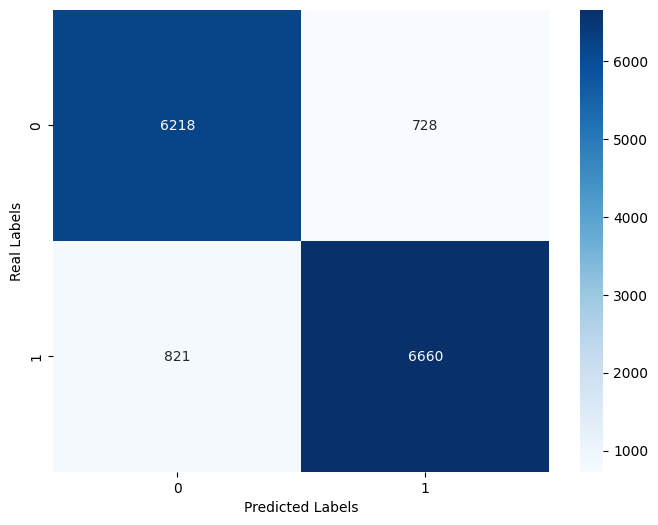

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred_nb), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
preddt = model.predict(x_test)
print(classification_report(y_test, preddt))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6946
           1       0.93      0.95      0.94      7481

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



Text(70.72222222222221, 0.5, 'Real Labels')

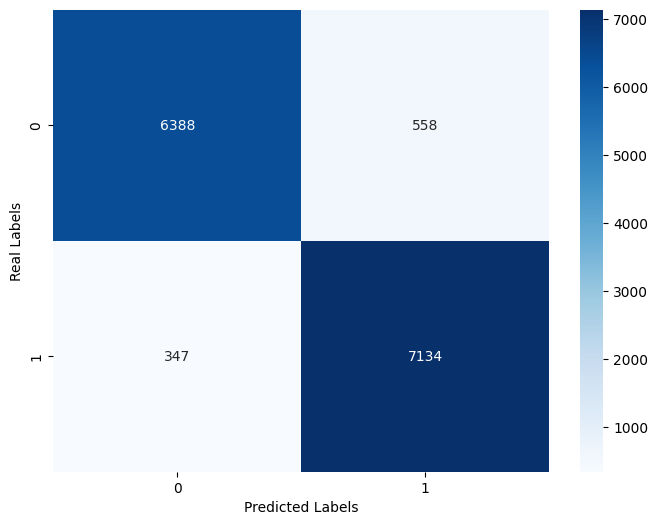

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,preddt), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

#Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=32)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=32)

In [ ]:
predrf = model.predict(x_test)
print(classification_report(y_test, predrf))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6946
           1       0.92      0.93      0.92      7481

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



Text(70.72222222222221, 0.5, 'Real Labels')

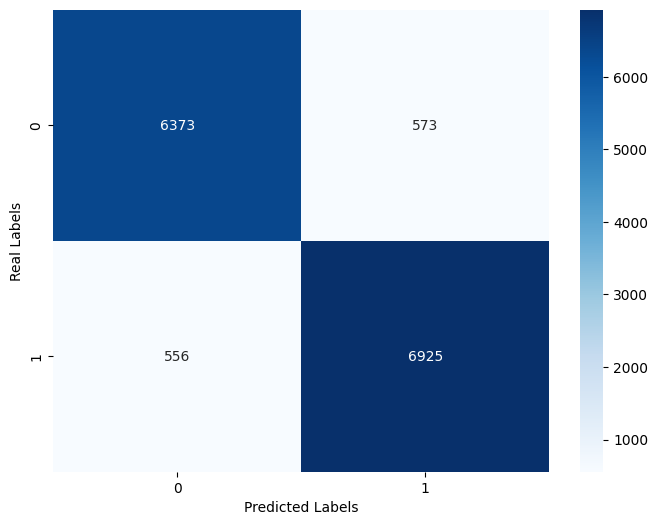

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,predrf), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')